# Exploratory Data Analysis (EDA)



## Importation des donnees

### Importation des donnees et transformation en CSV

<span style="color:#4f5c9c; font-weight:bold;">Pourquoi CSV plutôt qu'Excel?</span>

- **Simplicité du format** : Le format CSV est plus simple que celui d'Excel, ce qui facilite son utilisation et sa manipulation en Python.

- **Librairies spécialisées** : Python dispose de bibliothèques telles que csv et pandas qui offrent des fonctionnalités avancées pour la manipulation des fichiers CSV.

- **Performance** : Les opérations sur les fichiers CSV sont souvent plus rapides que sur les fichiers Excel, surtout pour les gros volumes de données.

- **Compatibilité multiplateforme** : Les fichiers CSV sont compatibles avec tous les systèmes d'exploitation, ce qui facilite leur utilisation sur différentes plateformes.

- **Légèreté** : Les fichiers CSV sont plus compacts que les fichiers Excel, ce qui les rend plus adaptés aux environnements avec des contraintes de stockage.


In [2]:
import pandas as pd
chemin_fichier = 'Accident1005.csv'
df = pd.read_csv(chemin_fichier)

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21990 entries, 0 to 21989
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUM_ACC      21990 non-null  int64  
 1   HEU_ACC      21990 non-null  int64  
 2   COD_PRV      21990 non-null  int64  
 3   COD_ETA_CHA  21990 non-null  int64  
 4   COD_ETA_SUR  21990 non-null  int64  
 5   COD_LUM      21990 non-null  int64  
 6   COD_INT      21990 non-null  int64  
 7   NUM_ROU      21990 non-null  int64  
 8   PKM          21990 non-null  float64
 9   COD_TYP_CHA  21661 non-null  float64
 10  POS_ACO_DRO  21093 non-null  float64
 11  POS_ACO_GAU  20433 non-null  float64
 12  SIG_HOR      21474 non-null  float64
 13  SIG_VER      21348 non-null  float64
 14  COD_TYP_COL  21027 non-null  float64
 15  COD_OBS_HRT  21990 non-null  int64  
 16  COD_POI_CHO  20106 non-null  float64
 17  COD_MAN      20434 non-null  float64
dtypes: float64(9), int64(9)
memory usage: 3.0 MB


## Missing Values-Valeurs manquantes



<span style="color:#4f5c9c; font-weight:bold;">Cette analyse est effectuée avec des données hors agglomération. Le code vise à montrer le taux de valeurs manquantes afin de décider de supprimer la colonne, de supprimer la ligne contenant les valeurs manquantes, ou de remplacer ces valeurs manquantes.</span>
<span style="font-size: 18px; color: #4f5c9c;"><strong>Évaluation des valeurs manquantes :</strong></span>
<ul>
    <li><span style="color: #fa8882;"><strong>Si les valeurs manquantes sont entre 65-100% :</strong></span> Supprimer la colonne.</li>
    <li><span style="color: #faa966;"><strong>Si les valeurs manquantes sont entre 50-65% :</strong></span> Supprimer les lignes contenant les valeurs manquantes.</li>
    <li><span style="color: #56b356;"><strong>Si les valeurs manquantes sont inférieures à 50% :</strong></span> Remplacer les valeurs manquantes.</li>
</ul>


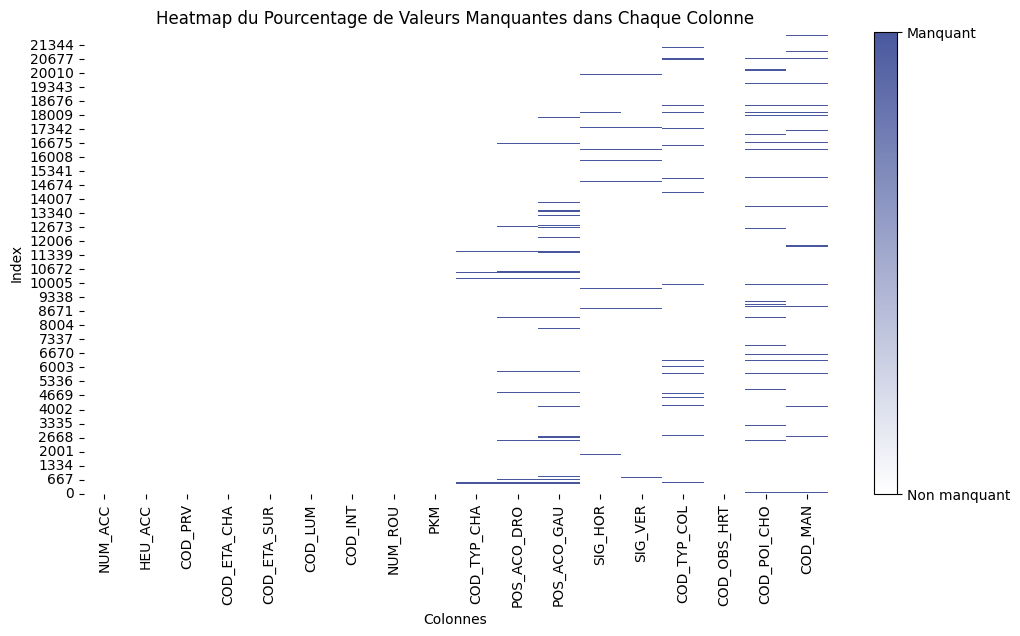

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

chemin_fichier = 'Accident1005.csv'
df = pd.read_csv(chemin_fichier)
pourcentage_valeurs_manquantes = (df.isnull().sum() / len(df)) * 100
colors = ["white", "#49589e"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.isnull(), cmap=cmap, cbar=False)
ax.invert_yaxis()
cbar = ax.figure.colorbar(ax.collections[0], ax=ax, location='right')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Non manquant', 'Manquant'])
plt.title('Heatmap du Pourcentage de Valeurs Manquantes dans Chaque Colonne', fontsize=12)
plt.xlabel('Colonnes', fontsize=10)
plt.ylabel('Index', fontsize=10)
plt.show()



In [7]:

missing_values_rate = (df.isnull().sum() / len(df)) * 100
print("Missing Values Rate (%):")
missing_values_rate_df = pd.DataFrame(missing_values_rate, columns=['Rate'])
missing_values_rate_df.index.name = 'Column'
missing_values_rate_df.style.set_caption('Missing Values Rate (%)').\
    highlight_null('red').\
    format({'Rate': '{:.2f}%'.format})

Missing Values Rate (%):


,Rate
Column,
NUM_ACC,0.00%
HEU_ACC,0.00%
COD_PRV,0.00%
COD_ETA_CHA,0.00%
COD_ETA_SUR,0.00%
COD_LUM,0.00%
COD_INT,0.00%
NUM_ROU,0.00%
PKM,0.00%


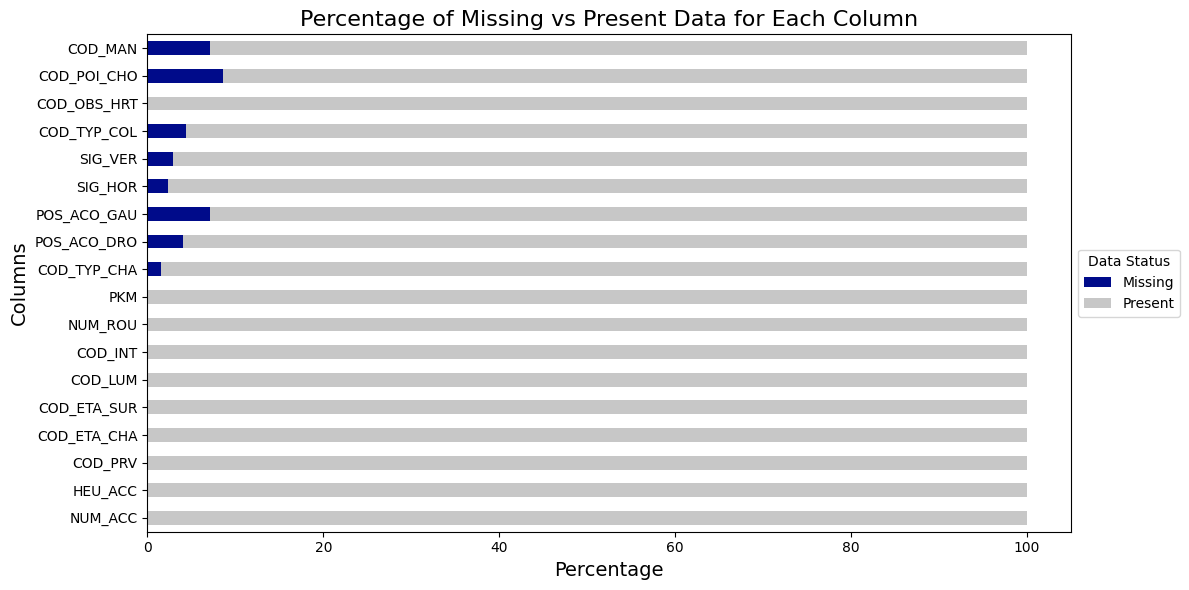

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
missing_percent = (df.isnull().sum() / len(df)) * 100
present_percent = 100 - missing_percent
missing_percent = (df.isnull().sum() / len(df)) * 100
present_percent = 100 - missing_percent
plot_data = pd.DataFrame({
    'Missing': missing_percent,
    'Present': present_percent})
fig, ax = plt.subplots(figsize=(12, 6))
plot_data.plot(kind='barh', stacked=True, color=['#000b8a', '#c7c7c7'], ax=ax)
ax.set_title('Percentage of Missing vs Present Data for Each Column', fontsize=16)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Columns', fontsize=14)
ax.legend(title='Data Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

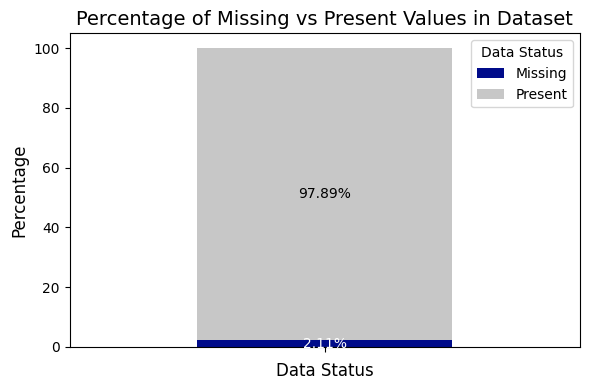

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
total_missing = df.isnull().sum().sum()
total_present = df.count().sum()
total_entries = df.size 
total_missing = df.isnull().sum().sum()
total_present = total_entries - total_missing
missing_percent = (total_missing / total_entries) * 100
present_percent = (total_present / total_entries) * 100
data = {'Missing': [missing_percent], 'Present': [present_percent]}
plot_df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(6, 4))
plot_df.plot(kind='bar', stacked=True, color=['#000b8a', '#c7c7c7'], ax=ax)
ax.set_title('Percentage of Missing vs Present Values in Dataset', fontsize=14)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Data Status', fontsize=12)
ax.legend(title='Data Status')
ax.text(0, missing_percent/2, f'{missing_percent:.2f}%', ha='center', va='center', color='white', fontsize=10)
ax.text(0, missing_percent + present_percent/2, f'{present_percent:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.set_xticklabels([])
plt.tight_layout()
plt.show()


**Colonnes à supprimer de toutes les tables ( 65-100%) :**
- <span style="color: #f04e46;">0 colonnes</span>

**Colonnes pour lesquelles les valeurs manquantes seront supprimées :**
- <span style="color: #faa966;">0 colonnes</span>

**Colonnes à traiter pour remplir les valeurs manquantes :**
- <span style="color: #56b356;">SIG_VER,SIG_HOR,COD_TYP_CHA,COD_TYP_COL,COD_POI_CHO,COD_MAN	,POS_ACO_DRO,POS_ACO_GAU	</span>


### Le remplacement des lignes contenant des valeurs manquantes : COD_PAY_ORI 0.33%

In [20]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

chemin_fichier = 'Accident1005.csv'
df = pd.read_csv(chemin_fichier)

pattern = '.*\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.*'
for col in df.columns:
    df[col] = df[col].replace(to_replace=pattern, value=np.nan, regex=True)

categorical_cols = ['COD_TYP_CHA', 'COD_TYP_COL', 'COD_POI_CHO', 'COD_MAN', 'POS_ACO_DRO','POS_ACO_GAU','SIG_VER','SIG_HOR']
df[categorical_cols] = knn_imputer.fit_transform(df[categorical_cols])
# df[categorical_cols] = np.round(df[categorical_cols]).astype(int)
df[categorical_cols].head()


,COD_TYP_CHA,COD_TYP_COL,COD_POI_CHO,COD_MAN,POS_ACO_DRO,POS_ACO_GAU,SIG_VER,SIG_HOR
0,1.0,7.0,1.0,11.0,1.0,1.0,1.0,1.0
1,2.0,3.0,7.0,6.0,1.0,1.0,1.0,1.0
2,2.0,8.0,1.0,16.0,1.0,1.0,1.0,1.0
3,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
4,2.0,8.0,1.0,16.0,1.0,1.0,1.0,1.0


In [22]:
pourcentage_valeurs_manquantes = (df.isnull().sum() / len(df)) * 100
print("Missing Values Rate (%):")
missing_values_rate_df = pd.DataFrame(pourcentage_valeurs_manquantes, columns=['Rate'])
missing_values_rate_df.index.name = 'Column'
missing_values_rate_df.style.set_caption('Missing Values Rate (%)').\
    highlight_null('red').\
    format({'Rate': '{:.2f}%'.format})

Missing Values Rate (%):


,Rate
Column,
NUM_ACC,0.00%
HEU_ACC,0.00%
COD_PRV,0.00%
COD_ETA_CHA,0.00%
COD_ETA_SUR,0.00%
COD_LUM,0.00%
COD_INT,0.00%
NUM_ROU,0.00%
PKM,0.00%


In [27]:
# Afficher le DataFrame 
pourcentage_valeurs_manquantes = pourcentage_valeurs_manquantes.style.background_gradient(cmap='Blues')
pourcentage_valeurs_manquantes.set_caption("Missing Values Count Avant et Apres l'Imputation")


AttributeError: 'Series' object has no attribute 'style'

In [24]:
# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Convert columns to integers
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].fillna(0).astype(int)
print(df.dtypes)


Column
NUM_ACC        int64
HEU_ACC        int64
COD_PRV        int64
COD_ETA_CHA    int64
COD_ETA_SUR    int64
COD_LUM        int64
COD_INT        int64
NUM_ROU        int64
PKM            int32
COD_TYP_CHA    int32
POS_ACO_DRO    int32
POS_ACO_GAU    int32
SIG_HOR        int32
SIG_VER        int32
COD_TYP_COL    int32
COD_OBS_HRT    int64
COD_POI_CHO    int32
COD_MAN        int32
dtype: object


In [26]:
df.to_csv('Accident_VF_1005.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21990 entries, 0 to 21989
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NUM_ACC      21990 non-null  int64
 1   HEU_ACC      21990 non-null  int64
 2   COD_PRV      21990 non-null  int64
 3   COD_ETA_CHA  21990 non-null  int64
 4   COD_ETA_SUR  21990 non-null  int64
 5   COD_LUM      21990 non-null  int64
 6   COD_INT      21990 non-null  int64
 7   NUM_ROU      21990 non-null  int64
 8   PKM          21990 non-null  int32
 9   COD_TYP_CHA  21990 non-null  int32
 10  POS_ACO_DRO  21990 non-null  int32
 11  POS_ACO_GAU  21990 non-null  int32
 12  SIG_HOR      21990 non-null  int32
 13  SIG_VER      21990 non-null  int32
 14  COD_TYP_COL  21990 non-null  int32
 15  COD_OBS_HRT  21990 non-null  int64
 16  COD_POI_CHO  21990 non-null  int32
 17  COD_MAN      21990 non-null  int32
dtypes: int32(9), int64(9)
memory usage: 2.3 MB


## telechargement de nouveau tableau vehicule
